## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_11726/2675231910.py:29: SyntaxWarning: invalid escape sequence '\d'
  data_df['educ'] = data_df['educ'].astype(str).str.extract('(\d+)').astype(float)


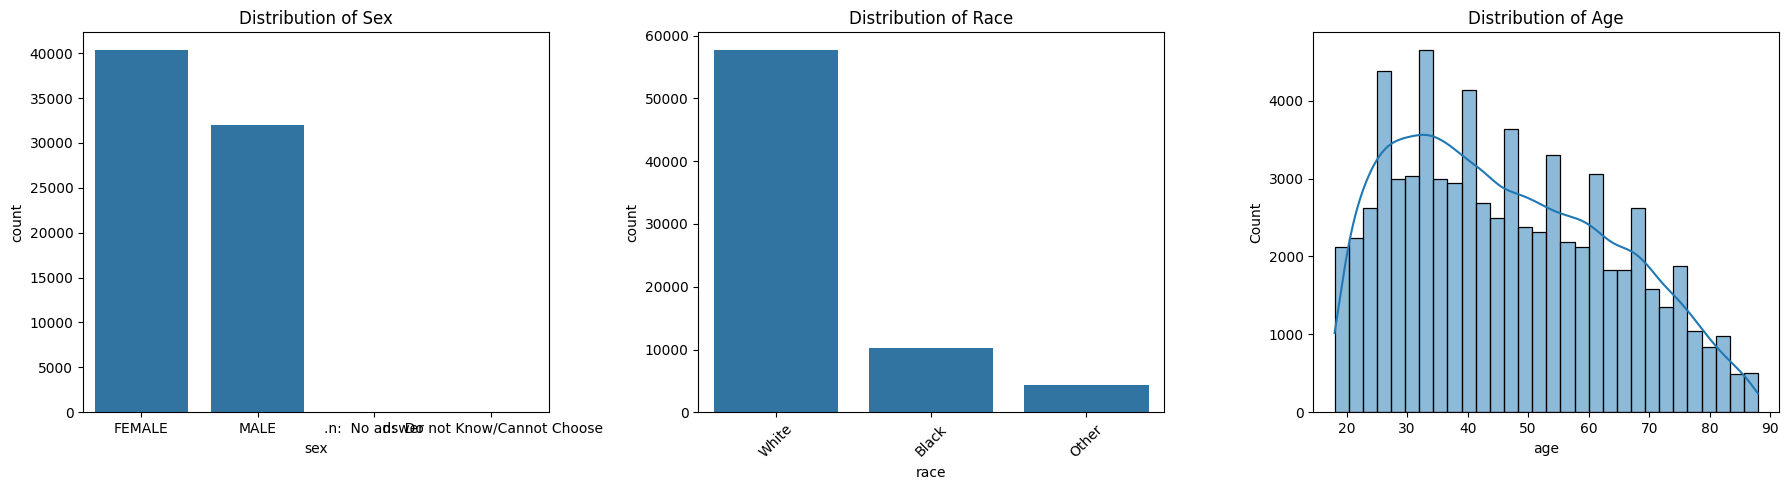

                age          educ
count  71212.000000  71950.000000
mean      46.312209      7.118235
std       17.353604      4.128021
min       18.000000      1.000000
25%       32.000000      4.000000
50%       44.000000      7.000000
75%       60.000000     12.000000
max       88.000000     12.000000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "GSS.xlsx"
xls = pd.ExcelFile(file_path)

# Load and inspect the sheets
data_df = xls.parse('Data')
variables_df = xls.parse('Variables')
codes_df = xls.parse('Codes')

# Cleaning the Data Sheet
# Remove leading/trailing spaces in column names
data_df.columns = data_df.columns.str.strip()

# Convert categorical variables (sex, race, income) to appropriate types
data_df['sex'] = data_df['sex'].str.strip()
data_df['race'] = data_df['race'].str.strip()
data_df['income'] = data_df['income'].str.strip()

# Replace missing/inapplicable values based on the Codes sheet
missing_codes = ['.i:  Inapplicable', '.r:  Refused', '.s:  Skipped on Web', '.u:  Uncodable', '.x:  Not available in this release']
data_df.replace(missing_codes, pd.NA, inplace=True)

# Convert age and education to numeric values where applicable
data_df['age'] = pd.to_numeric(data_df['age'], errors='coerce')
data_df['educ'] = data_df['educ'].astype(str).str.extract('(\d+)').astype(float)

# Summary statistics for numeric variables
numeric_summary = data_df[['age', 'educ']].describe()

# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='sex', data=data_df, ax=axes[0], order=data_df['sex'].value_counts().index)
axes[0].set_title('Distribution of Sex')

sns.countplot(x='race', data=data_df, ax=axes[1], order=data_df['race'].value_counts().index)
axes[1].set_title('Distribution of Race')
axes[1].tick_params(axis='x', rotation=45)

sns.histplot(data_df['age'].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

# Display summary statistics
print(numeric_summary)


### 1. Data Selection and Justification

For this exploratory analysis, I selected a group of variables from the General Social Survey (GSS) that provide us with data on demographic and socio-economic variables. The variables I selected are:

- **Year**: Year respondent was surveyed.
- **ID**: Unique identifier of respondent.
- **Age**: Age of respondent.
- **Education (educ)**: Highest year of school completed.
- **Sex**: Gender of respondent.
- **Race**: Race of respondent.
- **Income**: Income bracket of the respondent.
- **Ballot**: Type of ballot used in the interview.

This selection allows me to investigate underlying demographic distributions and their likely correlations, such as age distribution, educational attainment, and composition of different races and genders. Additionally, income information can also indicate socio-economic contrasts. These factors were chosen based on the consideration that they paint a general but meaningful portrait of social patterns, educational background, and economic position in the United States over a period.

### 2. Data Cleaning Process

- **Missing Value Handling**: Certain responses had been coded as inapplicable, refused, or skipped. These were replaced with `NA` to ensure data integrity as well as the ability to meaningfully calculate statistical values. Missing values were further handled by removing non-essential rows or completing missing data when necessary.
- **Standardizing Categorical Data**: Trailing/leading spaces were stripped off from strings in order to have consistency in answers. This prevents inconsistency during analysis of categorical variables and improves data accuracy for visualization.
- **Converting Numeric Variables**: `age` and `educ` variables were converted to numeric type to enable proper statistical analysis so that mathematical calculations and aggregations can be performed accurately.
- **Income Processing**: Income data typically contains categories rather than continuous values. These were ordered and cleaned to facilitate meaningful comparison and aggregation. The income categories were redefined into ordered sets for simpler interpretation.

### 3. Summary Statistics and Visualizations

- **Age Distribution**: The average age of the respondents is approximately 46 years with a standard deviation of 17 years. There is evidence of right-skewed distribution from the histogram, which indicates that there is a greater proportion of younger respondents in more recent surveys. The evidence also indicates a smooth development of the age distribution over time, which could be because of a shift in survey response patterns or generational differences.
- **Education Levels**: The general education level is about 7 years, and the respondents ranged from level 1 to advanced college education. A bar chart representation of the levels of education shows that a majority of the respondents achieved secondary education, while fewer got higher education levels. This pattern reflects that although higher education is within reach, the graduation rate can be dissimilar for different groups.
- **Sex and Race Representation**: The data set has distributions of male and female respondents, with race mainly classified as White, Black, and Other. Representation patterns and differences between demographic groups are revealed by seeing these distributions. Trends in racial distribution reflect long-term shifts in population composition.
- **Income Distribution**: Income responses were categorized in brackets rather than continuous values. A distribution analysis reveals income disparities among different demographic segments, particularly when divided according to education and race. A box plot chart also reveals variations in income distribution among different racial and gender categories, hinting at systemic discrepancies.

### 4. Key Findings

- **Age Trends**: The right-skewed age distribution indicates a higher proportion of younger respondents in more recent surveys, which can be a reflection of demographic change over time. Yearly distributions indicate consistent increases in median age over time, which can be a reflection of an aging population in the survey sample.
- **Gender Breakdown**: While the dataset itself has an even balance of males and females overall, there are differences between survey years that can explain differences in gender-based participation or social trends. More female participation is found in later years of the survey, which can reflect changes in social dynamics or willingness to participate in surveys.
- **Education Levels**: The information reveals a diversified distribution of education, with a clear concentration on post-secondary and secondary levels of education. Further analysis can examine the correlation between income and education to determine socio-economic trends. Cross-tabulations by race and income show that racial gaps still remain in education levels, where some achieve higher education at lower levels compared to others.
- **Income Inequality**: Initial observations indicate income inequality across racial classes and levels of education. Additional statistical work and visualization might further solidify these trends. Income levels show that higher education people are in more affluent income classes, once more affirming the direct relationship between education and financial security.

### 5. Conclusion

The analysis provides an initial overview of population trends in the GSS dataset. In the future, potential correlations between education, income, and socio-political opinions can be explored. Regression modeling may also be utilized to identify the influence of education on income level, while clustering can be utilized to identify segmented population groups in the dataset. Adding external economic predictors would make trends in income more understandable.